# Clustering Crypto

In [210]:
# Initial imports
import pandas as pd
import hvplot.pandas
from path import Path
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

### Deliverable 1: Preprocessing the Data for PCA

In [211]:
# Load the crypto_data.csv dataset.
file_path = "crypto_data.csv"
crypto_df = pd.read_csv(file_path)
#crypto_df.tail()

In [212]:
# Keep all the cryptocurrencies that are being traded.
crypto_df_true=crypto_df.loc[(crypto_df["IsTrading"]==1)]
#crypto_df_true.tail()

In [213]:
# Remove the "IsTrading" column. 
crypto_df_true.drop('IsTrading', axis=1, inplace=True)

C:\Users\laura\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [214]:
#crypto_df_true

In [215]:
crypto_df_true.dtypes

Unnamed: 0          object
CoinName            object
Algorithm           object
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

In [216]:
crypto_df_true.isnull().count()

Unnamed: 0         1144
CoinName           1144
Algorithm          1144
ProofType          1144
TotalCoinsMined    1144
TotalCoinSupply    1144
dtype: int64

In [217]:
crypto_df_true.isnull().any()

Unnamed: 0         False
CoinName           False
Algorithm          False
ProofType          False
TotalCoinsMined     True
TotalCoinSupply    False
dtype: bool

In [218]:
# Remove rows that have at least 1 null value.
crypto_df_dropna=crypto_df_true.dropna()
#crypto_df_dropna

In [219]:
# Keep the rows where coins are mined.
crypto_df_new=crypto_df_dropna.loc[(crypto_df_dropna["TotalCoinsMined"]>0)]
#crypto_df_new

In [220]:
#set new index
crypto_new_index=crypto_df_new.set_index("Unnamed: 0")

In [221]:
#drop name of index
crypto_new_index.index.name = None

In [222]:
# Create a new DataFrame that holds only the cryptocurrencies names.
name_df = crypto_new_index[["CoinName"]]
name_df

,CoinName
42,42 Coin
404,404Coin
1337,EliteCoin
BTC,Bitcoin
ETH,Ethereum
...,...
ZEPH,ZEPHYR
GAP,Gapcoin
BDX,Beldex
ZEN,Horizen


In [223]:
# Drop the 'CoinName' column since it's not going to be used on the clustering algorithm.
crypto_df_2=crypto_new_index.drop(columns=['CoinName'])

In [224]:
crypto_df_2.dtypes

Algorithm           object
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

In [225]:
crypto_df_2['TotalCoinSupply'] = crypto_df_2['TotalCoinSupply'].astype(float)

In [226]:
crypto_df_2.dtypes

Algorithm           object
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply    float64
dtype: object

In [227]:
crypto_df_2.head()
cyrpto_df=crypto_df_2
cyrpto_df.head(10)

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,4.200000e+01
404,Scrypt,PoW/PoS,1.055185e+09,5.320000e+08
1337,X13,PoW/PoS,2.927942e+10,3.141590e+11
BTC,SHA-256,PoW,1.792718e+07,2.100000e+07
ETH,Ethash,PoW,1.076842e+08,0.000000e+00
LTC,Scrypt,PoW,6.303924e+07,8.400000e+07
DASH,X11,PoW/PoS,9.031294e+06,2.200000e+07
XMR,CryptoNight-V7,PoW,1.720114e+07,0.000000e+00
ETC,Ethash,PoW,1.133597e+08,2.100000e+08
ZEC,Equihash,PoW,7.383056e+06,2.100000e+07


In [228]:
# Use get_dummies() to create variables for text features.
X=pd.get_dummies(crypto_df_2, columns=["Algorithm", "ProofType"])
X

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,4.200000e+01,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,5.320000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,3.141590e+11,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0.000000e+00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZEPH,2.000000e+09,2.000000e+09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GAP,1.493105e+07,2.500000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BDX,9.802226e+08,1.400223e+09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZEN,7.296538e+06,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [229]:
X.dtypes

TotalCoinsMined                     float64
TotalCoinSupply                     float64
Algorithm_1GB AES Pattern Search      uint8
Algorithm_536                         uint8
Algorithm_Argon2d                     uint8
                                     ...   
ProofType_Proof of Authority          uint8
ProofType_Proof of Trust              uint8
ProofType_TPoS                        uint8
ProofType_Zero-Knowledge Proof        uint8
ProofType_dPoW/PoW                    uint8
Length: 98, dtype: object

In [230]:
# Standardize the data with StandardScaler().
df_scaled = StandardScaler().fit_transform(X)
print(df_scaled[0:5])

[[-0.11710816 -0.15287029 -0.0433963  -0.0433963  -0.0433963  -0.06142951
  -0.07530656 -0.0433963  -0.06142951 -0.06142951 -0.0433963  -0.0433963
  -0.19245009 -0.06142951 -0.09740465 -0.0433963  -0.11547005 -0.07530656
  -0.0433963  -0.0433963  -0.15191091 -0.0433963  -0.13118084 -0.0433963
  -0.0433963  -0.08703883 -0.0433963  -0.0433963  -0.0433963  -0.0433963
  -0.06142951 -0.0433963  -0.08703883 -0.08703883 -0.08703883 -0.0433963
  -0.13118084 -0.13840913 -0.13840913 -0.0433963  -0.06142951 -0.0433963
  -0.07530656 -0.18168574 -0.0433963  -0.0433963  -0.0433963  -0.07530656
  -0.15826614 -0.31491833 -0.0433963  -0.08703883 -0.07530656 -0.06142951
   1.38675049 -0.0433963  -0.0433963  -0.06142951 -0.0433963  -0.0433963
  -0.0433963  -0.0433963  -0.0433963  -0.0433963  -0.0433963  -0.0433963
  -0.39879994 -0.0433963  -0.18168574 -0.0433963  -0.08703883 -0.08703883
  -0.10680283 -0.0433963  -0.13118084 -0.0433963  -0.0433963  -0.0433963
  -0.0433963  -0.07530656 -0.43911856 -0.04339

### Deliverable 2: Reducing Data Dimensions Using PCA

In [231]:
# Using PCA to reduce dimension to three principal components.
pca = PCA(n_components=3)

# Get three principal components for the data.
df_pca = pca.fit_transform(df_scaled)

In [232]:
# Create a DataFrame with the three principal components.
df_index=(X.index.tolist())
pcs_df = pd.DataFrame(
    data=df_pca, columns=["PC1", "PC2","PC3"], index = df_index
)
pcs_df.head(10)

,PC1,PC2,PC3
42,-0.331952,1.075505,-0.439047
404,-0.315303,1.075703,-0.439319
1337,2.308701,1.639662,-0.518416
BTC,-0.142642,-1.336169,0.121438
ETH,-0.154364,-2.016160,0.258006
LTC,-0.169217,-1.079709,-0.021672
DASH,-0.387694,1.168750,-0.380332
XMR,-0.154731,-2.286949,0.319336
ETC,-0.152808,-2.016256,0.257991
ZEC,-0.149832,-2.076770,0.355358


In [233]:
# Fetch the explained variance
#pca.explained_variance_ratio_

### Deliverable 3: Clustering Crytocurrencies Using K-Means

#### Finding the Best Value for `k` Using the Elbow Curve

C:\Users\laura\anaconda3\envs\mlenv\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.



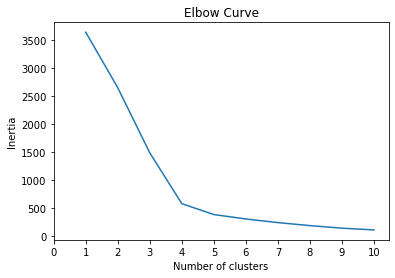

In [234]:
# Create an elbow curve to find the best value for K.

# Finding the best value for k
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(pcs_df)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


Running K-Means with `k=4`

In [235]:
# Initialize the K-Means model.
model = KMeans(n_clusters=4, random_state=0)

# Fit the model
model.fit(pcs_df)

# Predict clusters
predictions = model.predict(pcs_df)

pcs_df["class"] = model.labels_
pcs_df.head()

,PC1,PC2,PC3,class
42,-0.331952,1.075505,-0.439047,0
404,-0.315303,1.075703,-0.439319,0
1337,2.308701,1.639662,-0.518416,0
BTC,-0.142642,-1.336169,0.121438,2
ETH,-0.154364,-2.016160,0.258006,2


In [237]:
# Create a new DataFrame including predicted clusters and cryptocurrencies features.
# Concatentate the crypto_df and pcs_df DataFrames on the same columns.
crypto_df_join=pd.concat([crypto_df_2, pcs_df],axis=1)
#crypto_df_join

In [238]:
# Add a new column, "CoinName" to the clustered_df DataFrame that holds the names of the cryptocurrencies. 
clustered_df=pd.concat([crypto_df_join,name_df],axis=1)

#  Add a new column, "Class" to the clustered_df DataFrame that holds the predictions.
#already done above

# Print the shape of the clustered_df
print(clustered_df.shape)
clustered_df.head(10)

(532, 9)


,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,PC1,PC2,PC3,class,CoinName
42,Scrypt,PoW/PoS,4.199995e+01,4.200000e+01,-0.331952,1.075505,-0.439047,0,42 Coin
404,Scrypt,PoW/PoS,1.055185e+09,5.320000e+08,-0.315303,1.075703,-0.439319,0,404Coin
1337,X13,PoW/PoS,2.927942e+10,3.141590e+11,2.308701,1.639662,-0.518416,0,EliteCoin
BTC,SHA-256,PoW,1.792718e+07,2.100000e+07,-0.142642,-1.336169,0.121438,2,Bitcoin
ETH,Ethash,PoW,1.076842e+08,0.000000e+00,-0.154364,-2.016160,0.258006,2,Ethereum
LTC,Scrypt,PoW,6.303924e+07,8.400000e+07,-0.169217,-1.079709,-0.021672,2,Litecoin
DASH,X11,PoW/PoS,9.031294e+06,2.200000e+07,-0.387694,1.168750,-0.380332,0,Dash
XMR,CryptoNight-V7,PoW,1.720114e+07,0.000000e+00,-0.154731,-2.286949,0.319336,2,Monero
ETC,Ethash,PoW,1.133597e+08,2.100000e+08,-0.152808,-2.016256,0.257991,2,Ethereum Classic
ZEC,Equihash,PoW,7.383056e+06,2.100000e+07,-0.149832,-2.076770,0.355358,2,ZCash


### Deliverable 4: Visualizing Cryptocurrencies Results

#### 3D-Scatter with Clusters

In [240]:
# Creating a 3D-Scatter with the PCA data and the clusters

fig = px.scatter_3d(
    clustered_df,
    x="PC1",
    y="PC2",
    z="PC3",
    color="class",
    symbol="class",
    width=800,
    hover_name="CoinName",
    hover_data=["Algorithm"],
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()

In [244]:
# Create a table with tradable cryptocurrencies.
clustered_df.hvplot.table(columns=['CoinName','Algorithm','ProofType','TotalCoinSupply','TotalCoinsMined','class'], sortable=True, selectable=True)

:Table   [CoinName,Algorithm,ProofType,TotalCoinSupply,TotalCoinsMined,class]

In [245]:
# create scalable just coins dataframe
crypto_trade=clustered_df[clustered_df.columns[2:4]]
crypto_trade.head()

,TotalCoinsMined,TotalCoinSupply
42,4.199995e+01,4.200000e+01
404,1.055185e+09,5.320000e+08
1337,2.927942e+10,3.141590e+11
BTC,1.792718e+07,2.100000e+07
ETH,1.076842e+08,0.000000e+00


In [246]:
# Print the total number of tradable cryptocurrencies.
y=clustered_df["CoinName"].count()
print(f"There are {y} tradeable cryptocurrencies.")

There are 532 tradeable cryptocurrencies.


In [260]:
# Scaling data to create the scatter plot with tradable cryptocurrencies.
# YOUR CODE HERE
crypto_coins_scaled = MinMaxScaler().fit_transform(crypto_trade)
crypto_coins_scaled

array([[0.00000000e+00, 4.20000000e-11],
       [1.06585514e-03, 5.32000000e-04],
       [2.95755050e-02, 3.14159000e-01],
       ...,
       [9.90134792e-04, 1.40022261e-03],
       [7.37027937e-06, 2.10000000e-05],
       [1.29582244e-07, 1.00000000e-06]])

In [267]:
# Create a new DataFrame that has the scaled data with the clustered_df DataFrame index.
df_index2=(crypto_trade.index.tolist())
crypto_coins_scaled_with_index=pd.DataFrame(
    data=crypto_coins_scaled, columns=["Total_Coins_Mined_Scaled", "Total_Coin_Supply_Scaled"], index = df_index2
)
crypto_coins_scaled_with_index.head()


# Add the "Class" column from the clustered_df DataFrame to the new DataFrame. 
clustered_df2=pd.concat([crypto_df_join,crypto_coins_scaled_with_index],axis=1)
clustered_df2


# Add the "CoinName" column from the clustered_df DataFrame to the new DataFrame.
clustered_df3=pd.concat([clustered_df2,name_df],axis=1)
clustered_df3

plot_df = clustered_df3.reindex(columns=['Total_Coin_Supply_Scaled','Total_Coins_Mined_Scaled','CoinName','class'])
plot_df.head(10)

,Total_Coin_Supply_Scaled,Total_Coins_Mined_Scaled,CoinName,class
42,4.200000e-11,0.000000,42 Coin,0
404,5.320000e-04,0.001066,404Coin,0
1337,3.141590e-01,0.029576,EliteCoin,0
BTC,2.100000e-05,0.000018,Bitcoin,2
ETH,0.000000e+00,0.000109,Ethereum,2
LTC,8.400000e-05,0.000064,Litecoin,2
DASH,2.200000e-05,0.000009,Dash,0
XMR,0.000000e+00,0.000017,Monero,2
ETC,2.100000e-04,0.000115,Ethereum Classic,2
ZEC,2.100000e-05,0.000007,ZCash,2


In [270]:
# Create a hvplot.scatter plot using x="TotalCoinsMined" and y="TotalCoinSupply".
plot_df.hvplot.scatter(x="Total_Coins_Mined_Scaled", y="Total_Coin_Supply_Scaled", hover_cols="class", by="class")

:NdOverlay   [class]
   :Scatter   [Total_Coins_Mined_Scaled]   (Total_Coin_Supply_Scaled,class)